# **Jamming with Environmental Data Workshop**
*In celebration of NYC Open Data Week 2024!*

March 22, 2024

***Description:*** This hybrid workshop and data jam using Open NYC Data welcomes participants from all backgrounds to learn how to approach, analyze, and visualize data. By fusing both technical and non-technical lenses, we welcome folks who may be less comfortable working with numbers, data, or technology, and cultivate an interdisciplinary learning environment for people of all backgrounds and learning levels.

---

***Instructors:***

*   Kiley Matschke (CSC Post-Baccalaureate Fellow)

*   Marko Krkeljas (Senior Software & Applicatons Developer, CSC Technical Manager)

*   Feel free to reach us at kmatschk@barnard.edu & mkrkelja@barnard.edu!

---

***Resources and links:***

*Part I*

*   [Programming: NYC Open Data Week 2024](https://2024.open-data.nyc/)
*   [Barnard College Vagelos Computational Science Center (CSC)](https://csc.barnard.edu/)
*   [Dataset: Energy Usage from DOE Buildings](https://data.cityofnewyork.us/Environment/Energy-Usage-From-DOE-Buildings/mq6n-s45c/about_data)
*   [Dataset dictionary](https://data.cityofnewyork.us/api/views/mq6n-s45c/files/6dfeb54d-5613-41e4-b66d-3e54a516a65c?download=true&filename=Energy_Usage_From_DOE_Buildings.xlsx)
*   [Google Colab](https://colab.research.google.com/)
*   [ChatGPT](https://chat.openai.com/g/g-VXeJ4wNbs-jamming-with-environmental-data)

*Part II*
*   [Canva](https://www.canva.com/)
*   [Google Jamboard](https://jamboard.google.com/)
*   [Padlet](https://padlet.com/matschkekiley/jamming-with-environmental-data-52cpquwshpjjwq96)
*   [Workshop feedback form](https://bit.ly/csc-exit-spring24)


---

# **Dataset:** [Energy Usage from DOE Buildings](https://data.cityofnewyork.us/Environment/Energy-Usage-From-DOE-Buildings/mq6n-s45c/about_data)

# **Part I** :

*Summary:* Learn how to analyze an environmental dataset and generate visualizations in Google Colab, then extend these findings in ChatGPT.

### Colab Analysis:

In [ ]:
# For fetching data
import requests

# For manipulating the data
import pandas as pd

# For the bar chart visualization
import matplotlib.pyplot as plt
import plotly.express as px

# For the map visualization
import folium

**Import dataset**

In [ ]:
# JSON is a file format that uses text to store/transmit data objects
energy_url = "https://data.cityofnewyork.us/resource/mq6n-s45c.json"

# This "gets" the data from the url
response = requests.get(energy_url)

# This converts to a format we can import into a table
energy_data = response.json()

# Convert the JSON data into a DataFrame, which is like a table
energy_df = pd.DataFrame(energy_data)

# Display the DataFrame
energy_df

In [ ]:
# Let's get a full picture of all columns in this DataFrame
print(energy_df.columns)

**Our goal in this workshop is to determine how much each DOE building spent on energy usage from FYs 2009 - 2012, then visualize this on a bar chart and map.**

**Let's clean up this dataframe and remove columns which aren't needed for our analysis:**

In [ ]:
# Remove extra columns which aren't needed for our analysis
energy_df = energy_df.drop(['borough', 'measurement', '_1', '_2', 'postcode',
                            'community_board', 'council_district','census_tract',
                            'bin', 'bbl', 'nta'], axis=1)

# Display the DataFrame after cleaning
energy_df

**Let's consolidate this table by summing up the total energy cost of each fiscal year (FY), and storing these totals under new columns.**

**FY 2009:**

In [ ]:
# Isolate all monthly columns that fall under fiscal year 2009
fy2009 = ['fy_2009_7_1_2008','aug_08', 'sep_08', 'oct_08', 'nov_08', 'dec_08',
          'jan_09', 'feb_09', 'mar_09', 'apr_09', 'may_09', 'jun_09']

# Convert the monthly values from strings (text) to floats (numbers w/ decimals)
energy_df[fy2009] = energy_df[fy2009].astype(float)

# Add a new column to store the FY2009 sums for each row
energy_df['sum_fy2009'] = energy_df[fy2009].sum(axis=1)

# Display the first five rows of the DataFrame
# If you want to specify a different number of rows, add a number within the ()
energy_df.head()

**We repeat this for FY 2010, 2011, and 2012:**

In [ ]:
fy2010 = ['fy_2010_7_1_2009', 'aug_09', 'sep_09', 'oct_09', 'nov_09',
          'dec_09','jan_10', 'feb_10', 'mar_10', 'apr_10', 'may_10', 'jun_10']

energy_df[fy2010] = energy_df[fy2010].astype(float)

energy_df['sum_fy2010'] = energy_df[fy2010].sum(axis=1)

In [ ]:
fy2011 = ['fy_2011_7_1_2010', 'aug_10', 'sep_10', 'oct_10', 'nov_10',
          'dec_10','jan_11', 'feb_11', 'mar_11', 'apr_11', 'may_11', 'jun_11']

energy_df[fy2011] = energy_df[fy2011].astype(float)

energy_df['sum_fy2011'] = energy_df[fy2011].sum(axis=1)

In [ ]:
fy2012 = ['fy_2012_7_1_2011', 'aug_11', 'sep_11', 'oct_11', 'nov_11',
          'dec_11','jan_12', 'feb_12', 'mar_12', 'apr_12']

energy_df[fy2012] = energy_df[fy2012].astype(float)

energy_df['sum_fy2012'] = energy_df[fy2012].sum(axis=1)

In [ ]:
# Display the first five rows of the DataFrame
energy_df.head()

**Now, we can drop the individual monthly columns for FY 2009-2012:**

In [ ]:
# Combine all monthly columns from FY2009 - FY2012
# In Python, we can use + to join lists of strings together
all_fy = fy2009 + fy2010 + fy2011 + fy2012
print('All monthly columns FY2009-FY2012:\n',all_fy,'\n')

# Remove these columns from the DataFrame
energy_df = energy_df.drop(all_fy, axis=1)

# Display the DataFrame
energy_df

In [ ]:
print('Remaining columns after removing individual months:\n',energy_df.columns,'\n')

**Next, let's consolidate these costs into a single sum for all four FYs:**

In [ ]:
# Isolate the sums from all four fiscal years
sum_all_fy = ['sum_fy2009','sum_fy2010','sum_fy2011','sum_fy2012']

# Convert their values to floats (numbers with decimals)
energy_df[sum_all_fy] = energy_df[sum_all_fy].astype(float)

# Sum the total FY costs for each row and create a new column 'sum_fy2009-2012'
energy_df['sum_fy2009-2012'] = energy_df[sum_all_fy].sum(axis=1)

# Remove the individual fiscal year columns
energy_df = energy_df.drop(sum_all_fy, axis=1)

# Display the DataFrame
energy_df

**Finally, we aren't concerned with the individual types of energy usage for this example.**

**So, for each building, we merge the costs of ALL their energy usages into a single sum:**

In [ ]:
# Consolidate the costs of ALL energy usage types for each unique building
# This eliminates multiple rows with repeat buildings
energy_df = energy_df.groupby(['building_address', 'latitude', 'longitude'])['sum_fy2009-2012'].sum().reset_index()

# Display the DataFrame
energy_df

**Bar chart visualization:**

In [ ]:
# Sort the data in descending order by total fiscal years' sum
energy_df = energy_df.sort_values(by='sum_fy2009-2012', ascending=False)

# Create a figure of size 12 by 8
plt.figure(figsize=(12, 8))

# Write descripting labels for the axes and title
plt.xlabel('Total Energy Expenses (FY 2009-2012) (USD)', labelpad=20, weight="bold")
plt.ylabel('NYC DOE Building', weight="bold")
plt.title('NYC DOE Buildings\' Energy Expenses', weight="bold")

# Define bars which will represent cost sums for each building
bars = plt.barh(energy_df['building_address'], energy_df['sum_fy2009-2012'],
                color='skyblue')

# Display the exact numeric value next to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             '{:,}'.format(int(bar.get_width())), va='center', ha='left')

# Define a function which will aid in formatting the x-axis info
def format_x_axis_labels(x, loc):
    return "{:,}".format(int(x))

# Format the costs values along the x-axis
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_x_axis_labels))

# Invert the y axis so the highest sum school is at the top
plt.gca().invert_yaxis()

# Display the bar chart!
plt.show()

**We can take this a step further and consider the most expensive and least expensive schools. Let's look at energy cost per student!**

In [ ]:
#source: NY Post
murry_hs = 17747180 / 2562
print(f'Highest energy-spending school: ${murry_hs:,.2f} per student\n')

#source: US News & World Report
leadership_hs = 1015625 / 285
print(f'Lowest energy-spending school: ${leadership_hs:,.2f} per student')

**Map visualization:**

In [ ]:
# Convert the lat and long values to numeric values
energy_df['latitude'] = pd.to_numeric(energy_df['latitude'], errors='coerce')
energy_df['longitude'] = pd.to_numeric(energy_df['longitude'], errors='coerce')

# Determine the average location of all buildings
map_center = [energy_df['latitude'].mean(), energy_df['longitude'].mean()]

# Create a map using the avg location of all buildings
map = folium.Map(location=map_center, zoom_start=12)

# Add each building to the map, represented by circles of differing sizes
for idx, row in energy_df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=row['sum_fy2009-2012'] / energy_df['sum_fy2009-2012'].max() * 20, # Example scaling
                        popup='BUILDING: {} ---- TOTAL ENERGY COSTS: ${:,.2f}'.format(row['building_address'], row['sum_fy2009-2012']),
                        fill_color='darkgreen',
                        color='darkgreen',
                        fill_opacity=0.6).add_to(map)

# Display the map!
map

## **Now, let's pivot to [ChatGPT](https://chat.openai.com/g/g-VXeJ4wNbs-jamming-with-environmental-data) and garner its thoughts!**

# Prompt:

1.  This screenshot shows a map with circles that represent NYC schools. The size of the circles positively correlates to the amount they spend on energy (larger circles mean higher spending on energy usage). What are some meanings we can extrapolate from this map? How can we use the findings in this map to inform our decisions in the future?



# **Part II**

*Summary:* Participants split into small groups (or may choose to work individually) for a data jam which will focus on creative ways to present data. These mini-projects may take the form of songs, collages, stories, illustrations, poems, animations, and so on -- the hope is that participants use their creativity and strengths to discuss and dive deep into the data.

# Group 1: Collage
Prompt: Create a collage of any size that reflects aspects of the dataset! Consider any of the following:

*   Energy themes: electricity, gas, lights imagery
*   Department of Education (DOE): schools, academia imagery
*   Dates: incorporating 2009-2012 as text in some way
*   Highlighting cost! Use text or number graphics... consider ways to show which buildings had the highest or lowest energy expenses

For a digital collage, we recommend [Canva](https://canva.com).

**ChatGPT's collage:**

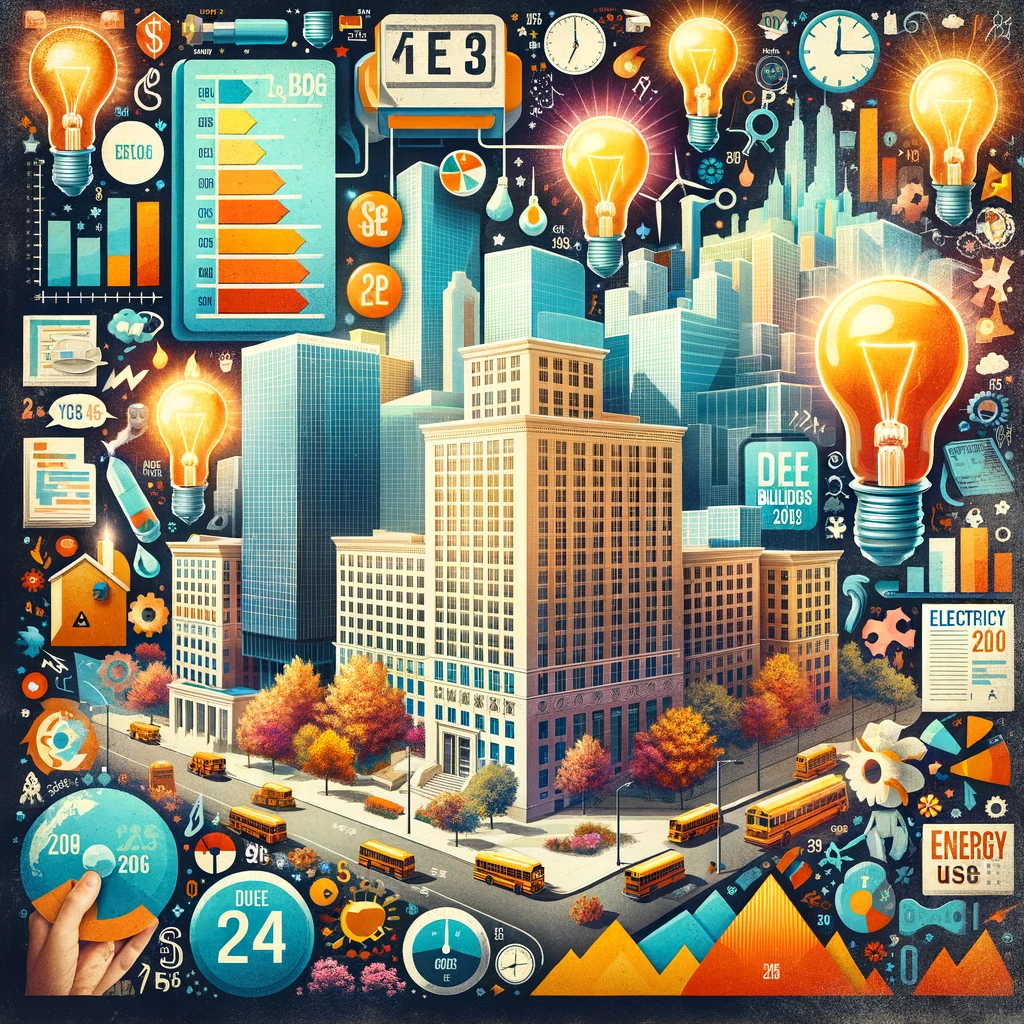

# Group 2: Poetry or prose
Prompt: Write a short poem, story, song, or other written piece that relates to this dataset. Consider the following:

*   How can you incorporate the buildings as settings into the text?
*   Think about characters, perhaps contributing to the energy usage
*   Try to incorporate some numerical data in a rhythmic or creative way





**ChatGPT's poem:**

In the heart of New York's bustling scene,  
Where DOE buildings stand proud and lean,  
There lies a tale of energy so vast,  
From 2009 to 2012, a four-year cast.

Electricity and gas, the figures dance,  
In kilowatt-hours, they advance.  
A story of usage, both high and low,  
With numbers telling where we can grow.

But costs, oh costs, they rise and fall,  
A fiscal dance at nature's call.  
Half a million dollars spent,  
In pursuit of knowledge, our intent.

So here's to energy, used with care,  
In DOE buildings everywhere.  
A commitment to sustainability,  
For a future bright, with possibility.

# Group 3: Illustration
Prompt: Make a drawing showcasing elements of this dataset. Consider:

*   Energy imagery: electricity, gas, lighting
*   School buildings
*   How can you showcase the costs? Different coloring, sizing, spacing, positioning?
*   NYC --> think about the map visualization and possibly incorporating elements of that into your illustration

For a digital illustration, we recommend [Google Jamboard](https://jamboard.google.com/).

**ChatGPT's illustration:**


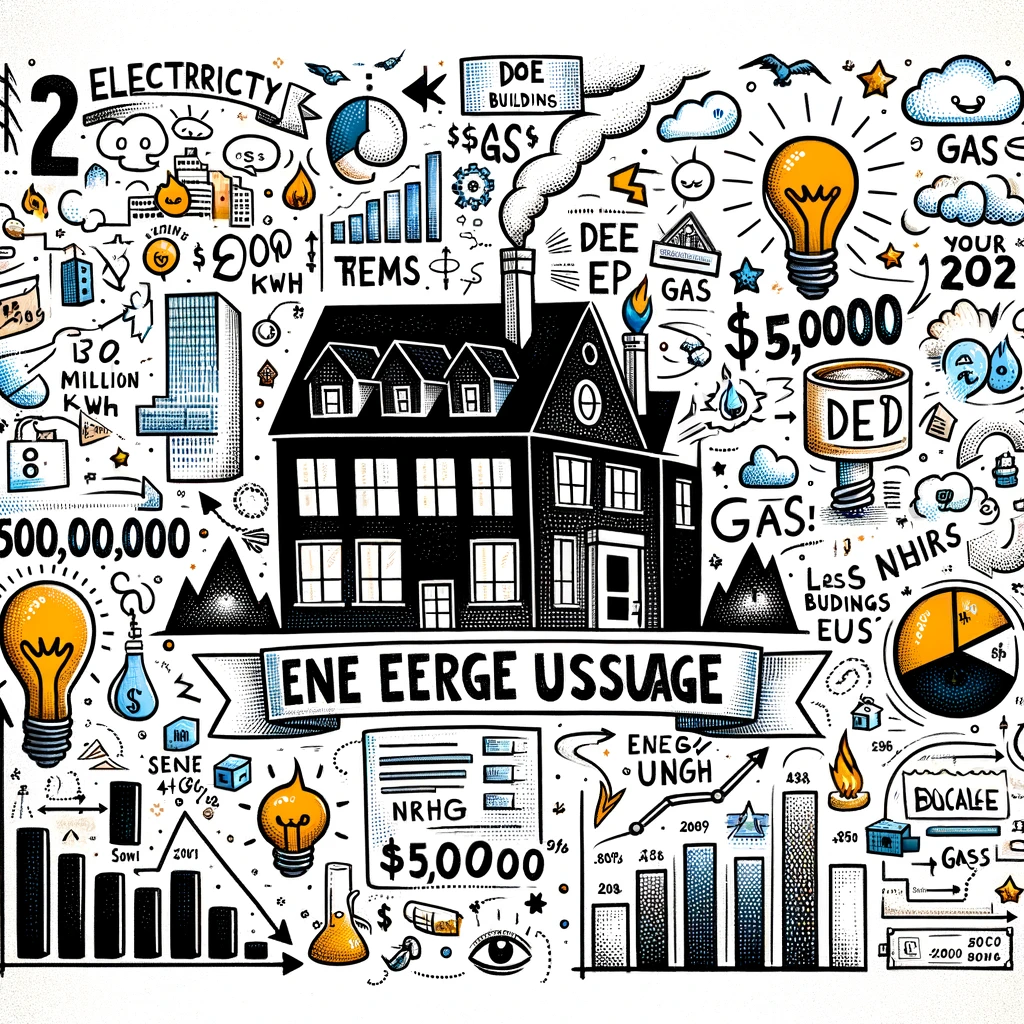

# Group 4: Other
Prompt: If the other prompts don't quite resonate with you, experiment with your own creative project!

### **Let's share! Add your creation to the Padlet below:**

https://padlet.com/matschkekiley/jamming-with-environmental-data-52cpquwshpjjwq96

## **Conclusion:**

The goals of this event were to understand the value of personal analysis and investigation, learn how to use data to create visualizations, and consider how we can break past the boundaries of how data visualization "should" look.

My hope is that all attendees leave this workshop with the notion that data isn't as scary as it may seem at first -- there is space for everyone to interact with it, no matter technical skill or background.

I encourage everyone to take the analysis explored in this workshop even further and to share new findings! Thank you.

